Porcentaje de hogares que destinan más del 10% de su ingreso a transporte público en CDMX

In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from matplotlib import font_manager
from pandas.api.types import CategoricalDtype


Temas para graficar

In [38]:
# Ruta al TTF estático
font_path = r"D:\Escritorio\Code\Graficar\static\Roboto-Regular.ttf"

# Agregar la fuente a Matplotlib
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Roboto'

In [39]:
# --- Configuración de estilo ---
plt.rcParams['font.family'] = 'Roboto'
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

Dataframe con los resultados históricos

In [40]:
# --- Datos corregidos y extendidos hasta el año base ---
df_final = pd.DataFrame({
    'ciclo': [2016, 2018, 2020, 2022, 2024] + list(range(2025, 2046)),
    
    'Observado': [11.82, 13.90, 6.23, 8.60, 5.26] + [np.nan] * 21,
    
    # Extensión: el año base (2024) iguala a 5.26 (último observado)
    'Inercial': [np.nan] * 4 + [5.26] + [
        5.062253, 4.871941, 4.688783, 4.512511, 4.342866, 4.179599,
        4.022469, 3.871247, 3.725709, 3.585644, 3.450843, 3.321111,
        3.196256, 3.076094, 2.960450, 2.849154, 2.742042, 2.638956,
        2.539746, 2.444266, 2.352375
    ],

    'Deseable': [np.nan] * 4 + [5.26] + [
        5.042085, 4.833198, 4.632965, 4.441027, 4.257041, 4.080678,
        3.911621, 3.749567, 3.594228, 3.445323, 3.302588, 3.165766,
        3.034613, 2.908893, 2.788381, 2.672862, 2.562129, 2.455983,
        2.354235, 2.256702, 2.163210
    ],

    'Transformador': [np.nan] * 4 + [5.26] + [
        5.021997, 4.794763, 4.577811, 4.370676, 4.172913, 3.984098,
        3.803827, 3.631712, 3.467386, 3.310494, 3.160702, 3.017688,
        2.881144, 2.750779, 2.626313, 2.507478, 2.394020, 2.285696,
        2.182274, 2.083531, 1.989256
    ]
})


In [41]:
#Año base
ano_base = 2024


In [42]:
# --- Estilo ---
plt.rcParams['font.family'] = 'Roboto'
sns.set_theme(style="whitegrid", font_scale=1.1)


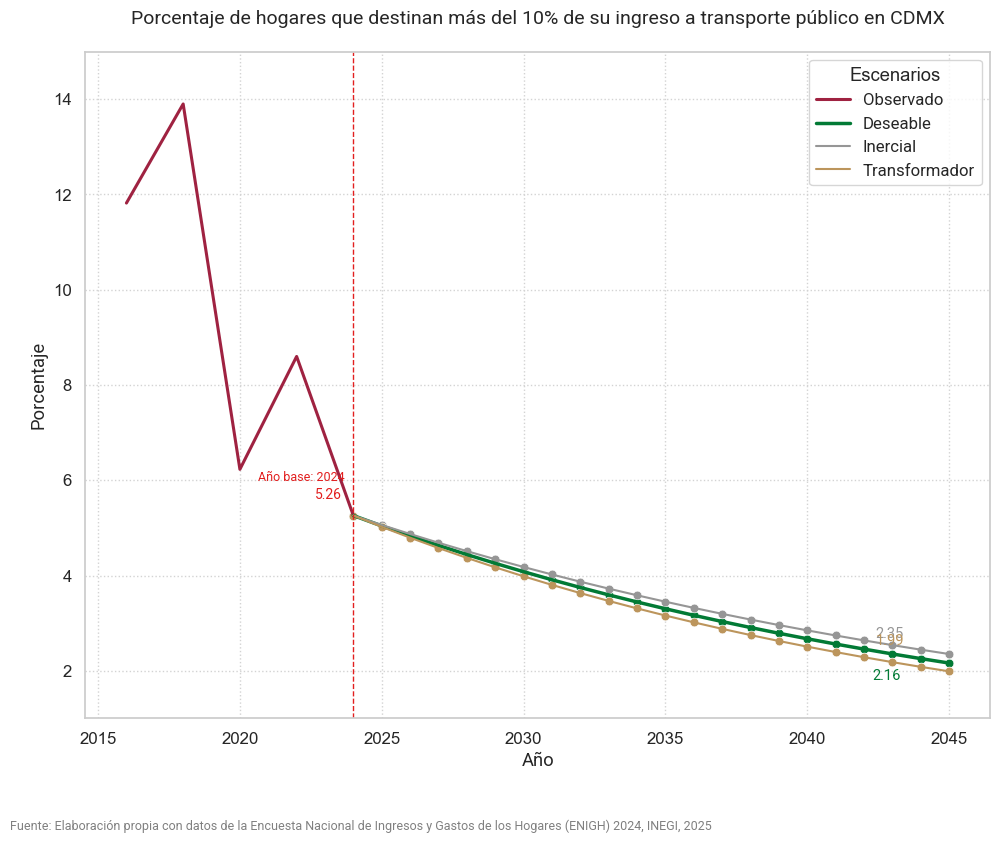

In [43]:
# --- Crear gráfico ---
plt.figure(figsize=(10, 8))

# Observado
sns.lineplot(data=df_final, x="ciclo", y="Observado",
             color="#9F2241", linewidth=2.2, label="Observado")

# Escenarios
sns.lineplot(data=df_final, x="ciclo", y="Deseable",
             color="#027a35", linewidth=2.5, label="Deseable")
sns.lineplot(data=df_final, x="ciclo", y="Inercial",
             color="#969696", linewidth=1.5, label="Inercial")
sns.lineplot(data=df_final, x="ciclo", y="Transformador",
             color="#BC955C", linewidth=1.5, label="Transformador")

sns.scatterplot(data=df_final, x="ciclo", y="Deseable", color="#027a35", s=40)
sns.scatterplot(data=df_final, x="ciclo", y="Inercial", color="#969696", s=40)
sns.scatterplot(data=df_final, x="ciclo", y="Transformador", color="#BC955C", s=40)

# --- Línea y texto del año base ---
plt.axvline(x=ano_base, color="#E21F1F", linestyle="dashed", linewidth=1)
plt.text(ano_base - 0.3, df_final["Deseable"].loc[df_final["ciclo"] == ano_base].values[0] + 0.8,
         f"Año base: {ano_base}",
         fontsize=9, color="#E21F1F", fontfamily='Roboto',
         ha='right', va='center')

# --- Etiquetas finales (orden visual jerárquico) ---
# Etiqueta del valor en el año base
valor_base = df_final.loc[df_final["ciclo"] == ano_base, "Deseable"].values[0]
plt.text(ano_base - 0.4, valor_base + 0.35, f"{valor_base:.2f}",
         fontsize=10, color="#E21F1F", fontfamily='Roboto', weight="bold", ha='right')

valor_des = df_final.loc[df_final["ciclo"] == 2045, "Deseable"].values[0]
plt.text(2045 - 2.7, valor_des - 0.35, f"{valor_des:.2f}",
         fontsize=10.5, color="#027a35", weight="bold", fontfamily='Roboto')

valor_iner = df_final.loc[df_final["ciclo"] == 2045, "Inercial"].values[0]
plt.text(2045 - 2.6, valor_iner + 0.35, f"{valor_iner:.2f}",
         fontsize=10.5, color="#969696", weight="bold", fontfamily='Roboto')

valor_trans = df_final.loc[df_final["ciclo"] == 2045, "Transformador"].values[0]
plt.text(2045 - 2.6, valor_trans + 0.55, f"{valor_trans:.2f}",
         fontsize=10.5, color="#BC955C", weight="bold", fontfamily='Roboto')

# --- Diseño ---
plt.title("Porcentaje de hogares que destinan más del 10% de su ingreso a transporte público en CDMX",
          fontsize=14, loc="center", wrap=True, weight="bold", fontfamily='Roboto', pad=20)
plt.xlabel("Año", fontfamily='Roboto')
plt.ylabel("Porcentaje", fontfamily='Roboto')
plt.legend(title="Escenarios", loc="best", frameon=True, prop={'family': 'Roboto'})
plt.ylim(1, 15)
plt.grid(True, linestyle=":", color="lightgray")
plt.figtext(0.0, -0.05,
            "Fuente: Elaboración propia con datos de la Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH) 2024, INEGI, 2025",
            ha="left", fontsize=9, color="gray", fontfamily='Roboto')

plt.tight_layout()
plt.savefig("nuevo_porcent_hog_10_trans_pub.png", dpi=200, bbox_inches="tight", facecolor="white")
plt.show()

